In [1]:
import final as f

# Scientific Computing Final: MysteryODE
#### Daus(Davis) Carmichael
##### 12-17-2020

## Introduction
This report will describe the many relationships that the given equation generates. The report  will discuss initially how the simulation is to be set up and then analyze a singular case through all the graphing methods implemented on this assignment. After the single case similiar, though less comprehensive, analysis will be done for 4 other cases. Other patterns found through this methodology will then be analyzed, this includes the analysis of the convergent values for specific b-values as well as the structure of the xy-construct. This will also include analysis of the smallest b value and the most evenly distributing b-value. Following the graphical analysis of the trajectory, analysis will be done observing the graph of asymptotic values in the x coordinate against the b value. Following this analysis, a discussion into the efficiency of the code is done and some final details discussing the meaning andother useful packets of information. 

## Basis
The investigation into the behaivor of the ODE $\frac{d\vec{r}}{dt}=\begin{bmatrix}
0\\
0\\
b
\end{bmatrix} 
+ 
\begin{bmatrix}
0&-1&-1\\
1&.2&0\\
0&0&5.7
\end{bmatrix} \cdot
\begin{bmatrix}
x\\
y\\
z
\end{bmatrix} + \begin{bmatrix}
0\\
0\\
xz
\end{bmatrix}  \equiv \vec{b} + \hat{M}\vec{r}+\vec{f_{nl}}(\vec{r})$ is created using python code. For maximum efficiency the code was written such that pre-optimized code bases such as `numba` and `numpy` were applicable. Past the opttimization the actual code was written to apply the Runge-Kutta 4th order approximation.

$u_{k+1} = u_k+\frac{1}{6}(K_1+2K_2+2K_3+ K_4)$  
where:  
 $K_1 = \Delta t\,f[t_k,u_k]$, 
   
   $K_2 = \Delta t\, f[t_k + \Delta t/2, u_k + K_1/2]$, 
   
   $K_3 = \Delta t\, f[t_k + \Delta t/2, u_k + K_2/2]$, 
   
   $K_4 = \Delta t\,f[t_k + \Delta t, u_k + K_3]$  

This is implemented through functions each representing a part of the original ODE. Each matrix and its respective operators are passed the position vector $\vec{r}$ and the time $t$. Although the function time is time independent, the solution is still general and the same structure can be used for many scenarios.  

The code is encapsulated in a class that is constructed with the parameters. These are the same parameters that will be passed to the `solve_ode` function. Within the class, the equation can be solved with the particular b-value given. The magic call on the object will check if the equation needs to be solved, that is if the data is populated, decide whether to execute the solution and save the data to its `self.data` field. This data can then be saved and loaded from disk with the respective `save` and `load` functions, taking the filename as a parameter.  
  
The class also contains several plotting methods. _(Several is seven)_ These show the 2 dimensional, 3-dimensional and 1-dimensional relationships for the differential equation specified by the b-value.

## Graphs and Data

The first graphs shown will show the data from the equation with a b-value of 1.5. 

In [2]:
series_15 = f.MysteryODE(1.5)

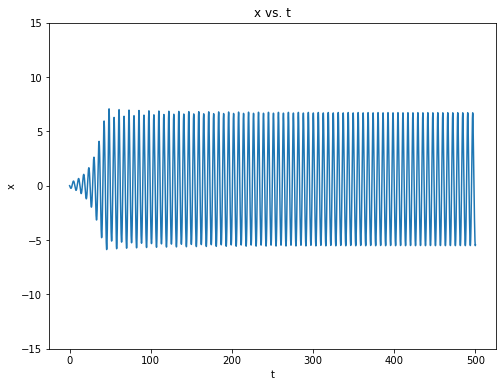

In [3]:
series_15.plotx()

**The first graph shows the relationshp between the x component of the distance vector and time for `b=1.5`.** The function seems to be a harmonic oscillator with varying amplitude, the behaivor of this is described here. Seen in the behaivor of the minima and maxima, the amplitudes of the extrema seem to oscillate on a small interval before finally converging and remaining relativley constant after about `t=150`. After this time the function seems to oscillate with a constant amplitude and period. The period was calculated to be about 6.125s and the amplitude of tthe x measured to be 6.68 seen in the maximum. This was calculated by taking a period once the function began its oscillation with constant amplitude and used `numpy's` .amax() function. The chosen period was [300, 306.25]

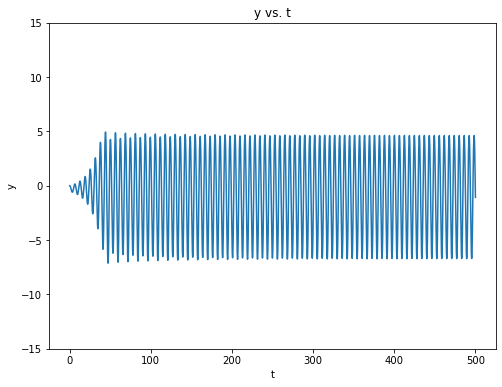

In [4]:
series_15.ploty()

**This graph shows the relationshp between the y component of the distance vector and time for `b=1.5`.** The relationship seems to be almost identical to the x-value and all conclusions made from the previous graph also apply here. However, they are not the same. First, the amplitude of the y-oscillation us approximatley 5, so not much lower but it is a non-negligble amount. However, further relationships between the x and y functions will emerge when the two are plotted against each other. The same procedure was used to calculate the amplitude, with the same period specified. From [300, 306.25] the amplitude of the y coordinate was 4.64.

In [5]:
#series_15.plotz()

**This graph shows the relationship between the z-component of the distance vector.** The amplitude shows a alternating pattern similar to the x and t components. The difference is the behaivor of these amplitudes. While the previous 2 followed natural oscillations centered around 0, the z-coordinate is greater than 0. After a short period of oscillation with negligble amplitude the function experiences exponential growth. To analyze the amplitudes we take a list of all the local maximas in order for $t\geq60$, and call it $L$. We then look see a pattern and notice the first maxima is smaller than the next and the next maxima is greater than the next. The pattern emerges: 
<p style="text-align: center;">for $\geq{t}\geq60$ AND $i\mod{2}=0$ <br> $L_{i-1}<L_i$ AND $L_{i+1}<L$</p>
Note: while it appears the 
If the entries are taken where the index is even, and given to a set $S_{max}$. This set is called $S_{max}$ as these values are greater than the maximas near them. When plotted on the time axis a pattern emerges. For the smaller maximas, the function over time looks like a logistic function. If the initial outliers are discounted, the function appears like a logarithmic function. For the larger maximas, the function between the values is an exponential decay. An interesting observation is that the minima do not have a similiar structure and form a 'U' shape.

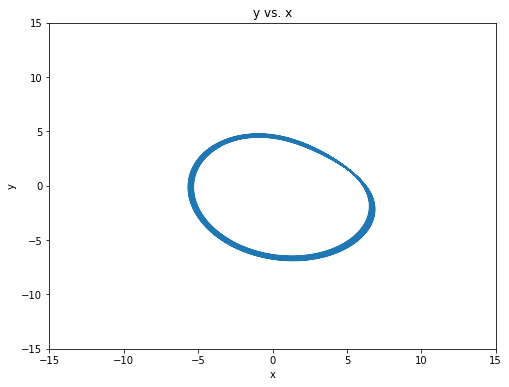

In [6]:
series_15.plotxy()

**The plot between x and y for `b=1.5`.** The functions initially appeared to mirror each other. In turns the functions were phase shifter appart to create a ellipse like shape. The width is non-negligble due to the oscillation of the function and later convergence to a specific value. However, the major and minor axes do not line up with with x and y axis. This means the 2 functions are not time shifted one-quarter period from each other as in a traditional ellispe or circle. 

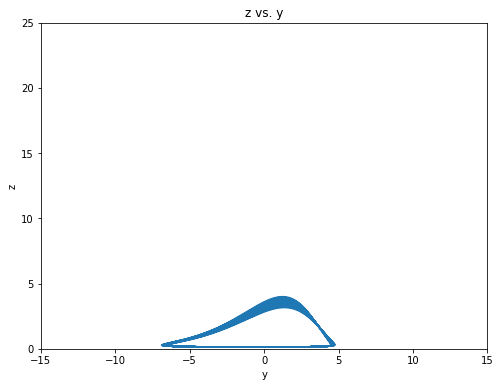

In [7]:
series_15.plotyz()

**Graph showing the relationship between z(vertical), y(horizontal)** The graph shows the function if observed looking in the x-direction towards the functions domain. The graph shows the z-value has peak at y$\approx$2. An important distinction to make is that this graph is not a cross section, but rather all values of y and z. This means we can find no meaning full relationship between the x coordinate from this graph however it does provide some insight to the relationship between to the y and z variables. The most meaningful takeaway is simply to observe the motion of the particle in the yz plane and see constraints from the trajectory. 

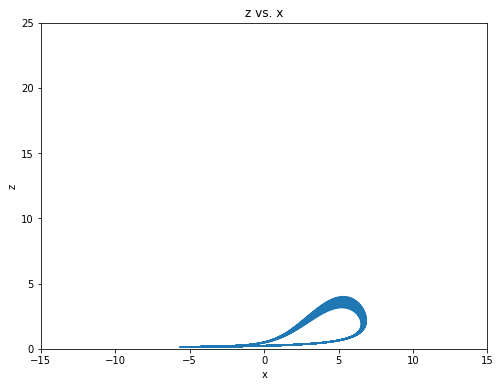

In [8]:
series_15.plotxz()

**The plot between z vs. x**. This while interesting shapes emergedoes not glean much new insight. It is clear that for $x<0$, the z values are near neglible if not 0. The z value is shown clearly to have more than one value for any given x, this coupled with the previous 2-d graphs  show that there is no sinular dependence on any variable, in other words the relations are all dependent on each other.  

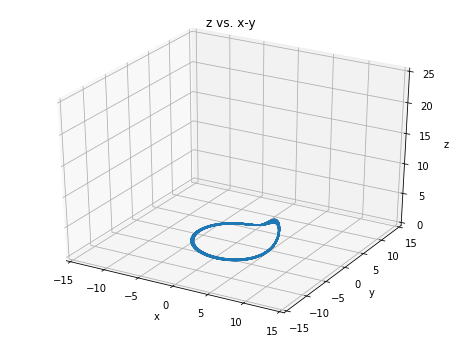

In [9]:
series_15.plotxyz()

**The final time-independent graph** The graph shows the particle is constrained to a thin region. The shapes in each direction are the previous 3 graphs. In the xy, the particle orbody would be constrained to an ellispe phase shifted from $\phi_0=0$. In the yz, a rounded triangle shape with a maxima at $y\approx2$ and in the final direction, in the xz-plane a knot like shape appeared. 

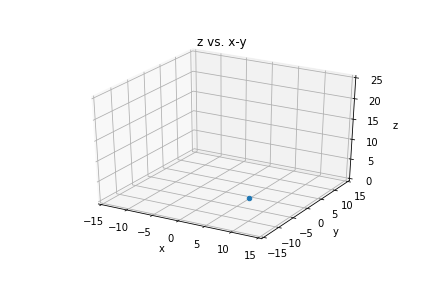

In [10]:
from IPython.display import Image

with open('False_diff_eq.gif','rb') as file:

    display( Image(file.read()) )

#### GIF (for free)
This represents the data from the xyz plot above. This differs however, as it is only plotting a single period with 49 frames each approximately one eighth of a second of separation between them. This also allows for the observation of the speed at which the particle moves as all frames are designed to have equal time intervals between them so that the faster the particle moes in the GIF, the faster it is  actually moving. This allows for the observation of angular velocity and its direction. In this case the angular velocity is pointed upwards. 👍(RHH)  
Note: I was on stream and some people were wondering about plotting and MATLAB and I mentioned the GIF problem so I created a GIF method for chat.

### Other cases
The insights gleaned from the previous data show only for a particular case of `b=1.5`. The next section will show the data for the 3 cases `b=1.0`, `b=.8`, `b=.7`, `b=.4`.


##### b=1.0

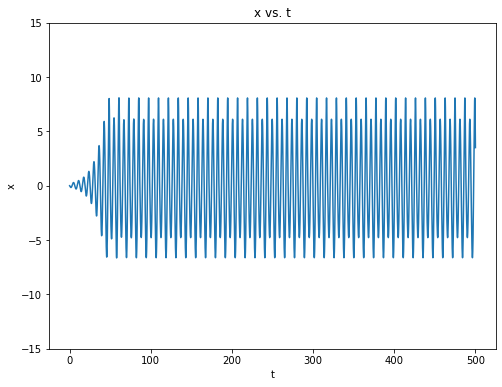

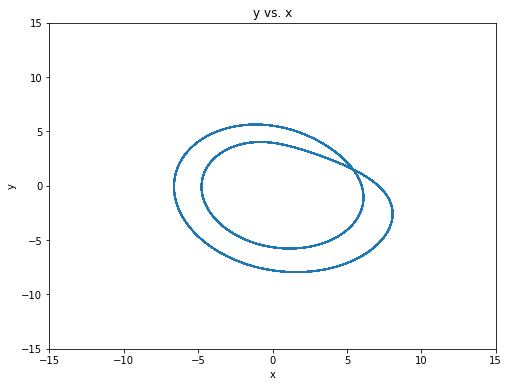

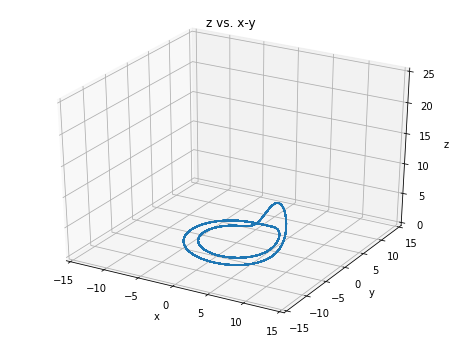

In [11]:
onepointoh=f.MysteryODE(1.0)
onepointoh.plotx()
onepointoh.plotxy()
onepointoh.plotxyz()

The graphs here show the relationship between the cooridnates for b=1.0. The most striking difference between the case b=1.5 and this case is that once the function, $x(t)$ is settled, there are 2 maxima values. Additionally the xy graph is further evidence that the x and y coordinates arerelated. The direction of the ellipse (major axis) is similar to the previous case. From the xyz graph it is intersting to see for the smaller x values(when the amplitdue is smaller) the z value does not have a peak as it does in the previous case and does for the ring further from x=0. 

##### b=0.8

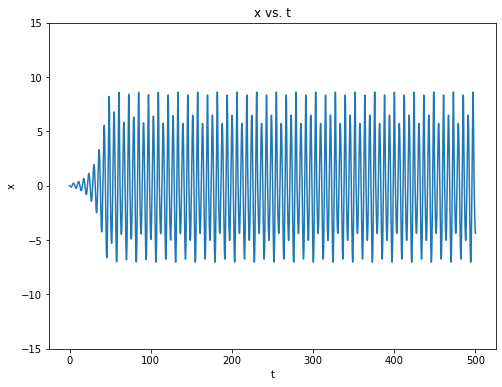

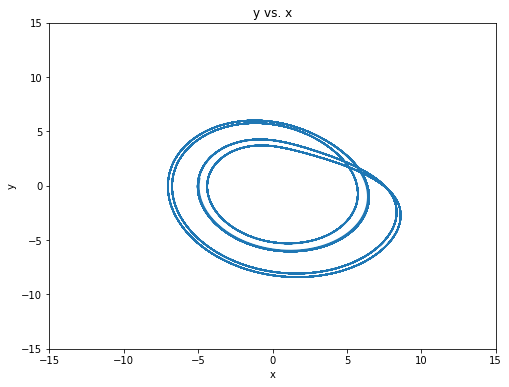

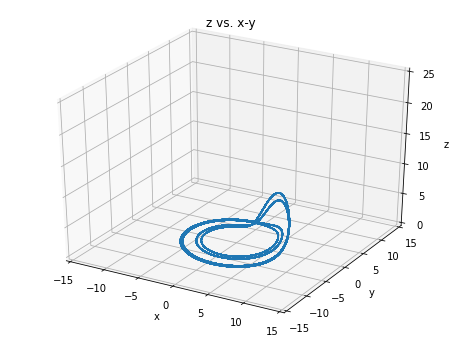

In [12]:
zeropointeight=f.MysteryODE(0.8)
zeropointeight.plotx()
zeropointeight.plotxy()
zeropointeight.plotxyz()

The overall structure of these graphs seems to mirror that of the 2 previous cases, however a striking difference is observed in the $x(t)$ graph. The previous graphs had 1 or 2 values that the oscillation would reach, this graph has 4 different values. Again, the values of x and y seem to be related showing the same structure as before, and the angle at which the ellipse is angled is similiar to the previous graphs. In this case there are a total of 4 paths travelled. The same behaivor of the z value having a peak for the outer ring while the inner ring has a near zero value. This only slightly differs in that there are 2 ring but each ring is comprised of 2 paths. 

##### b=0.7

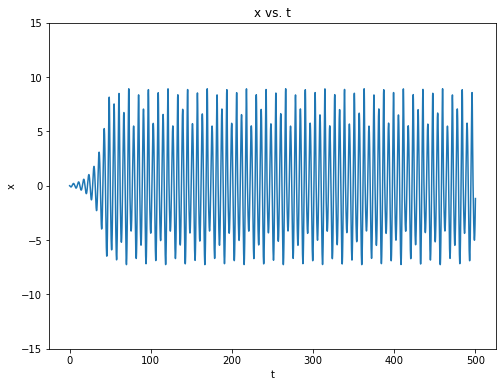

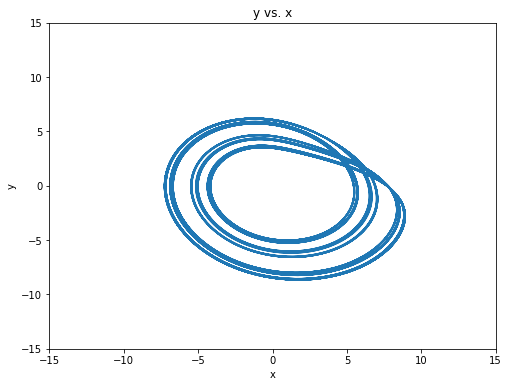

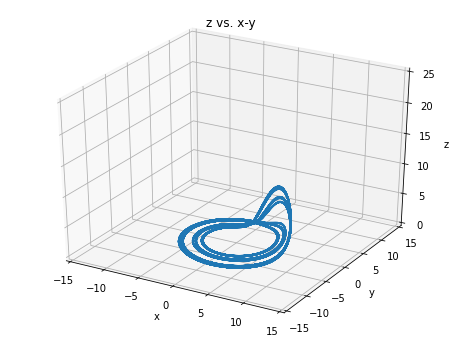

In [13]:
zeropointseven=f.MysteryODE(0.7)
zeropointseven.plotx()
zeropointseven.plotxy()
zeropointseven.plotxyz()

For the case of `b=0.7` the same structure is seen but the number of rings has once again increased. There are 6 rings total, seperated into sets of 2. The same structure is maintained, however the convergence of $x(t)$ is much more complex. The convergence(or the tendency of the maximas) appears to be be in sets of 6. That is there is a pattern every 6 maximas, the pattern repeats. The rings on the outside have a peak in the z coordinate. Even though the middle  two values are close,their z values vary significantly.

##### b=0.4

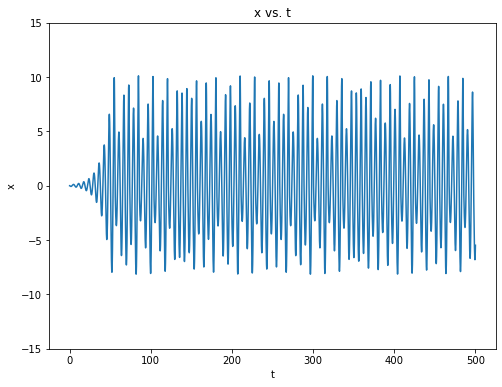

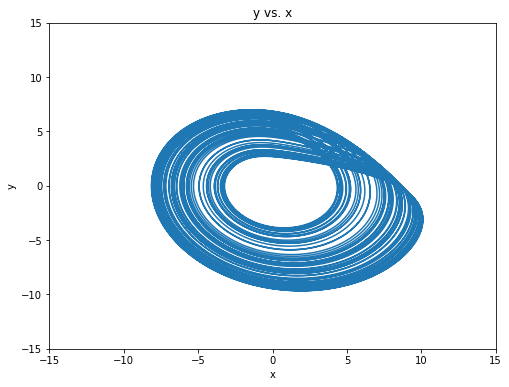

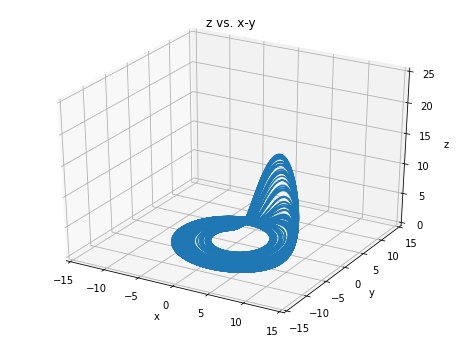

In [14]:
zeropointfour=f.MysteryODE(0.4)
zeropointfour.plotx()
zeropointfour.plotxy()
zeropointfour.plotxyz()

For `b=0.4` the same structure still exists although the convergence at specific values is completely gone. There exist some points where the x and y values do not reach, but these are far outnumbered by the spaces that are populated by the position. Again, the structure and angle of the ellipse like shape in xy space is maintained as well as the oscillation in the $x(t)$ function with the same period. The same structure as the previous cases seems to emerge with what looks to be about half of the rings experiencing a large peak in the z direction. A difference here is that the values of this peak range from near zero to the order of $10^1$. 

#### Other graphs

In addition to these graphs showing the basis of the patterns that later emerge in the analysis of the asymptotic values,there are very intersting particular instances. 

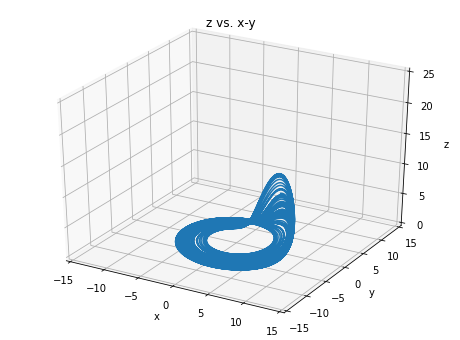

In [15]:
even_distr = f.MysteryODE(.55)
even_distr.plotxyz()

The structure again remains the same,but the white  space, or space where the particle would not have traversed is much lower. The center is the circle defined by x and y and maintains the strucute and angle previously determined. The peak in the z direction for x values greater than zero seems to show the trend that the further from 0 in the x-direction the function is, the larger the peak will be. That is $z_{max}=f(x)$, where $f(x)$ is an increasing function. The structure is maintained and simply enhances the understanding of the relationship better. While slightly different in structure to the `plotxyz()` for `b=1.5`, the same relation holds true. It is just not as clear given that their are only 2 rings for the b-value, 1.5.

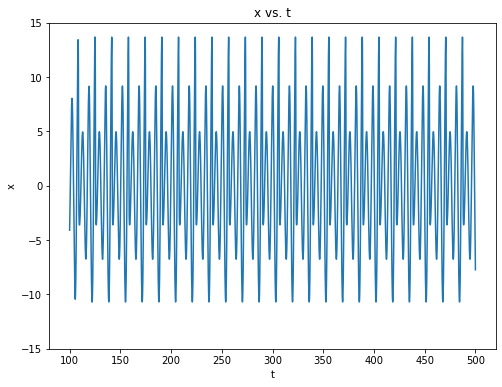

In [16]:
smallb=f.MysteryODE(.05)
smallb.plotx((100,500))

For b=.05, the smallest b value examined in this experiment,there are 3 converging values for x. This is gathered from the amplitude of the oscillating function $x(t)$ changing between the three values. The values are approximately 14, 9, and 5. In this case the minimums are the negative of their counter parts. This graph and the graph of $x(t)$ for `b=1.5` show that there is not a catch all function to describe the effect of b. Additionally, the procedure to reduce x to only have three asymptotic values fir the oscialltion can be used for the other cases, to see the actual behaivor of these convergent values of x. The procdure being removing outliers from when the function, $x(t)$ was not stable.

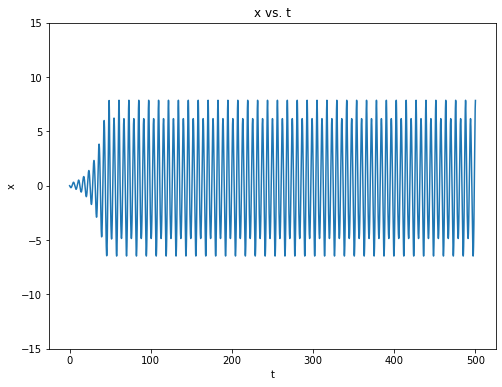

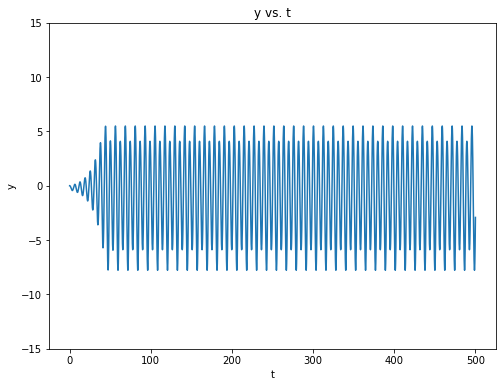

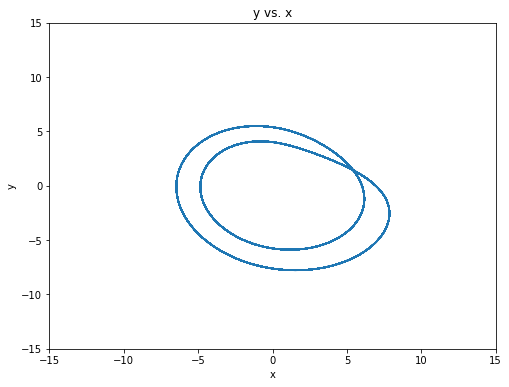

In [17]:
onepointone = f.MysteryODE(1.1)
onepointone.plotx()
onepointone.ploty()
onepointone.plotxy()

As seen on the asymptotic-value graph, `b=1.1` has one of the most well defined convergences. The x value and y value, both have 2 amplitudes which alternate between each other. This point was chosen for solely the convergence with respect to b, however, as the b-value was essentially chosen at random, the angle of the ellispe is the same as all the other cases. This means that the x and y functions have aconstant time-shift between them for any b-value. This is the premise for one of the future experiments. 

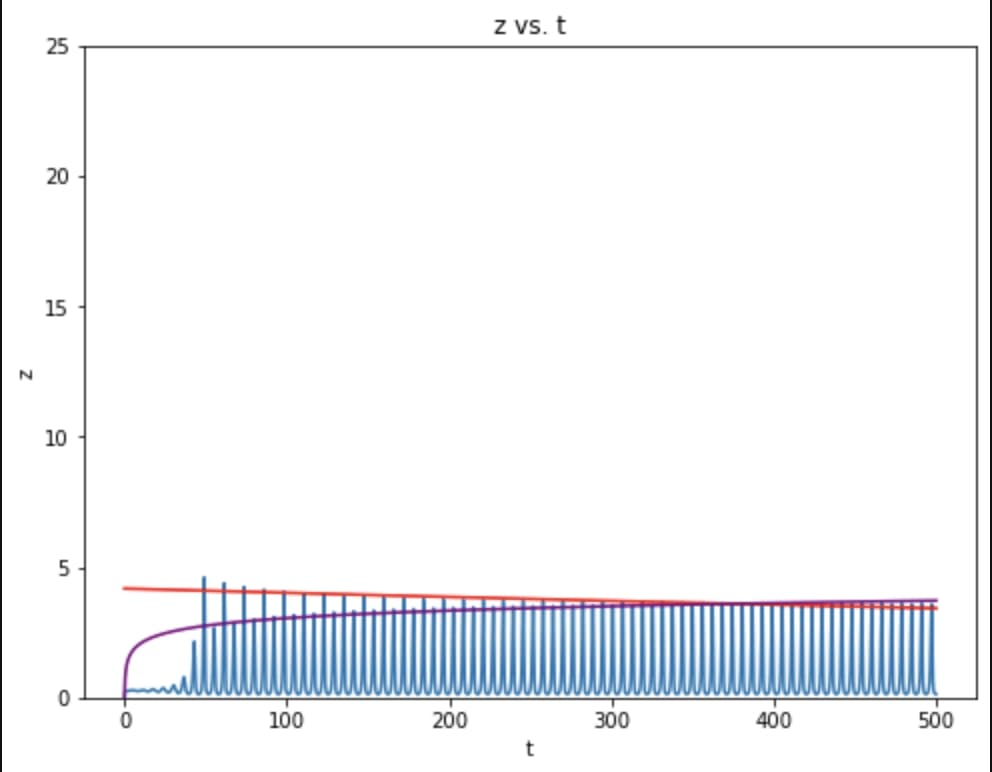

In [18]:
Image(filename="plotz_with_eqs.jpg", width=480)

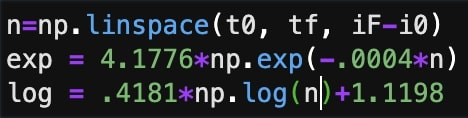

In [19]:
Image(filename="equations_plotz15_pycode.jpg", width=240)

This is the z graph for `b=1.5` with the equations modelling the large and small maximas. The equations for the large and small maximas respectively is the exponetial decay  and logarithmic growth and translated from python are:
<p style="text-align: center;">$z_{lg}=4.1776e^{-.0004t}$</p>
<p style="text-align: center;">$z_{sm}=.4181\cdot \ln{(t)} + 1.1198$</p>
The code uses `t0` and `tf` to  represent the final and initial time values. These values are translated into indices and from those indices, the number of frames that the equations would be plotted against is generated. The equations are then plotted alongside the dependent variable.

### Analysis of asymptotic values

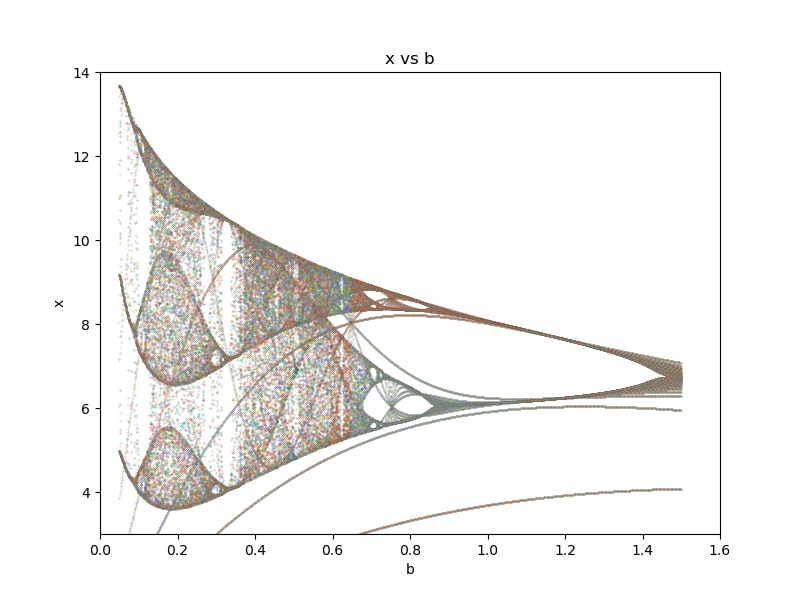

In [20]:
Image(filename="asymptotic_behaivor_db=.001.jpg", width=640)

The analysis of the maximas of the x value for different b-values was calculated iteratively. The entire computation took 25547074ms, about 17619ms per b value. For a total of just over 7 hours. 
Interesting patterns observed in asymptotic plot are described broadly. For small b-values, $.05\leq b \leq.6\overline9$ there is little convergence although some values have many more maximas. These patterns continue out ofthe specified range. At  $b=.7$, the asymptotes begin to converge. The darker a line is, the more maximas occured at that x-value. This will be called density. There exist continuous and smooth lines of dense values. There are 6 for small b-values(~.4), and 2 separate and the other 4 converging for b near 1.5.

#### Patterns in depth
The first pattern, or lack thereof, of no convergent values for small b values, ($.05\leq b \leq.6\overline9$) is seen through a soft scattering of points. While this did not have any points the equation truly converged to, it did have values that were more likely to be maximas for x. These are observed by the dense lines. For the small values, while most of the values were not convergent, ~$.3$ had a small set of maxima. This convergence is almost a continuation of the desnity before and after `b=.3` In this first region, outside of this particular b, there was little convergence and the maximas were distributed across the y-axis(x). While the distribution did cross most of the range, there were areas of higher and lower density. For example, from $.1\leq{b}\leq.3$, the denser regions are bounded by the most dense region, the lines. The prevalence of x being maximas for these b-values is higher for the x-values within the region than outside of the boundaries. After `b=0.3` the equation approaches a much more evenly distributed scattering of maximas. This again is bounded by the densist regions which are the lines previoulsy described. For the domain $.3\leq{b}\leq.7$, the distribution is nearly even. There are 2 regions of significantly different densities, the upper has a higher density and the lower region has a lower density. Both of the densities are close to as dense as the most dense regions of $.05\leq b \leq.3$. After `b=0.7` the final convergingvalues begin to emerge. The 2 values from the top and line converge for this region as well as the middle 4 lines(approaching from the left). THe bottom line is formed at this point and is greater than 3, this and the first line directly above the  bottomline remain sparate fromthe others for all b-values.  
Additionally, it is clear that with the exception of the dense boundaries, the density of points is a continous and perhaps a smooth function of b and x. This is best seen in the regions bounded entirely by the borders, the density in themis relativley constant over the entire region. Outside of these regions, the density is not  constant but seems to be "dependent" on the values around it. This dependency is not a dependency, but rather due to the relation. To describe the relationship, the best way to  describe it is the more dense a region is, the more likely it is for its neighbors to be dense as well. This is not generally true, as in some regions the density approaches 0 for particular sections. However this seems to be the trend. A more general way to define the density is the density of a slice is close to that of the slicesnear it. This is applicable mainly with respect to b, but has some truth when taking a slice of x-values. 


#### Runtime Analysis
The most interesting part of this part of the experiment was the runtime. When initally checked, through checking time per operation times the number of operations the original predicted runtime was 48 minutes. A long interval of time had passed and the code was about 30% or 40% complete. The simulation had to be stopped in order to change the execution. Timing elements were added as well as print statements to observe the process. Several db values were plotted and time analysis was done on this. the db values were from .01 to .1. 

$S_{db}$={.01, .02, .03, .04, .05, .06, .07, .08, .09, .10}

The performance was measured and recorded. This was all done by implementing a main method for the executable to process. 
The results are as follows. 

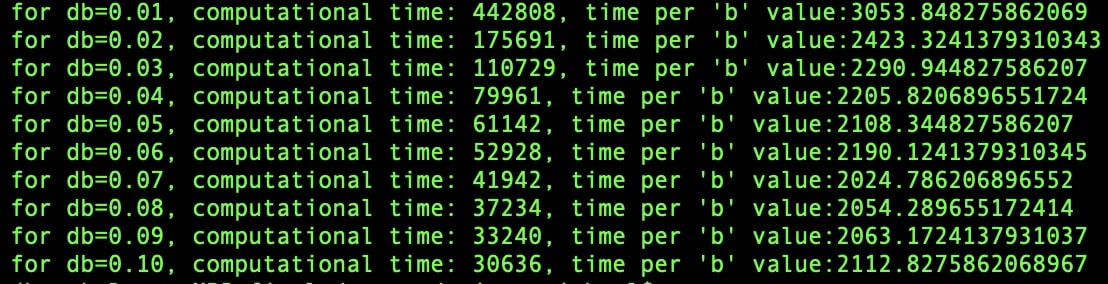

In [21]:
Image(filename="timing_data.jpg", width=456)

The data shows a decrease in effiency per operation as the db is smaller. The time per operation and number of operations are porportional. While no changes happened in the code the efficiency decreased due to use of resources irresponsibly. Consistent with the findings, the initial case of `b=1.5` shows a decline in performance the later a b values is. That is the more b-values calculated before, the less efficient the code will be for that b-value. For the first b values, the average time is between 2-3 seconds, while the final b-values take near 30 seconds each. This is consistent with the findings that the larger db-values are more efficient because there are less b-values the code will perform the calculation for. These observations both reach the same conclusion. 

### Other Patterns
While poking around data there are always patterns that are interesting, this natural curiosity and pattern recognition is one of the ways that humans discover new relationships.  
 

#### Similarities to a black hole shape

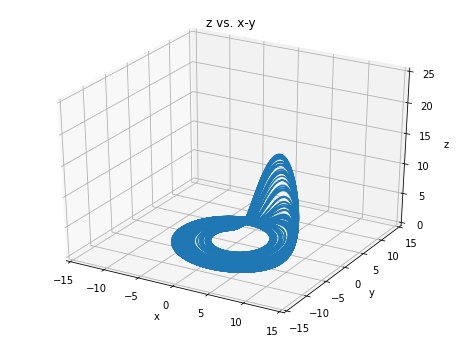

In [22]:
zeropointfour.plotxyz()

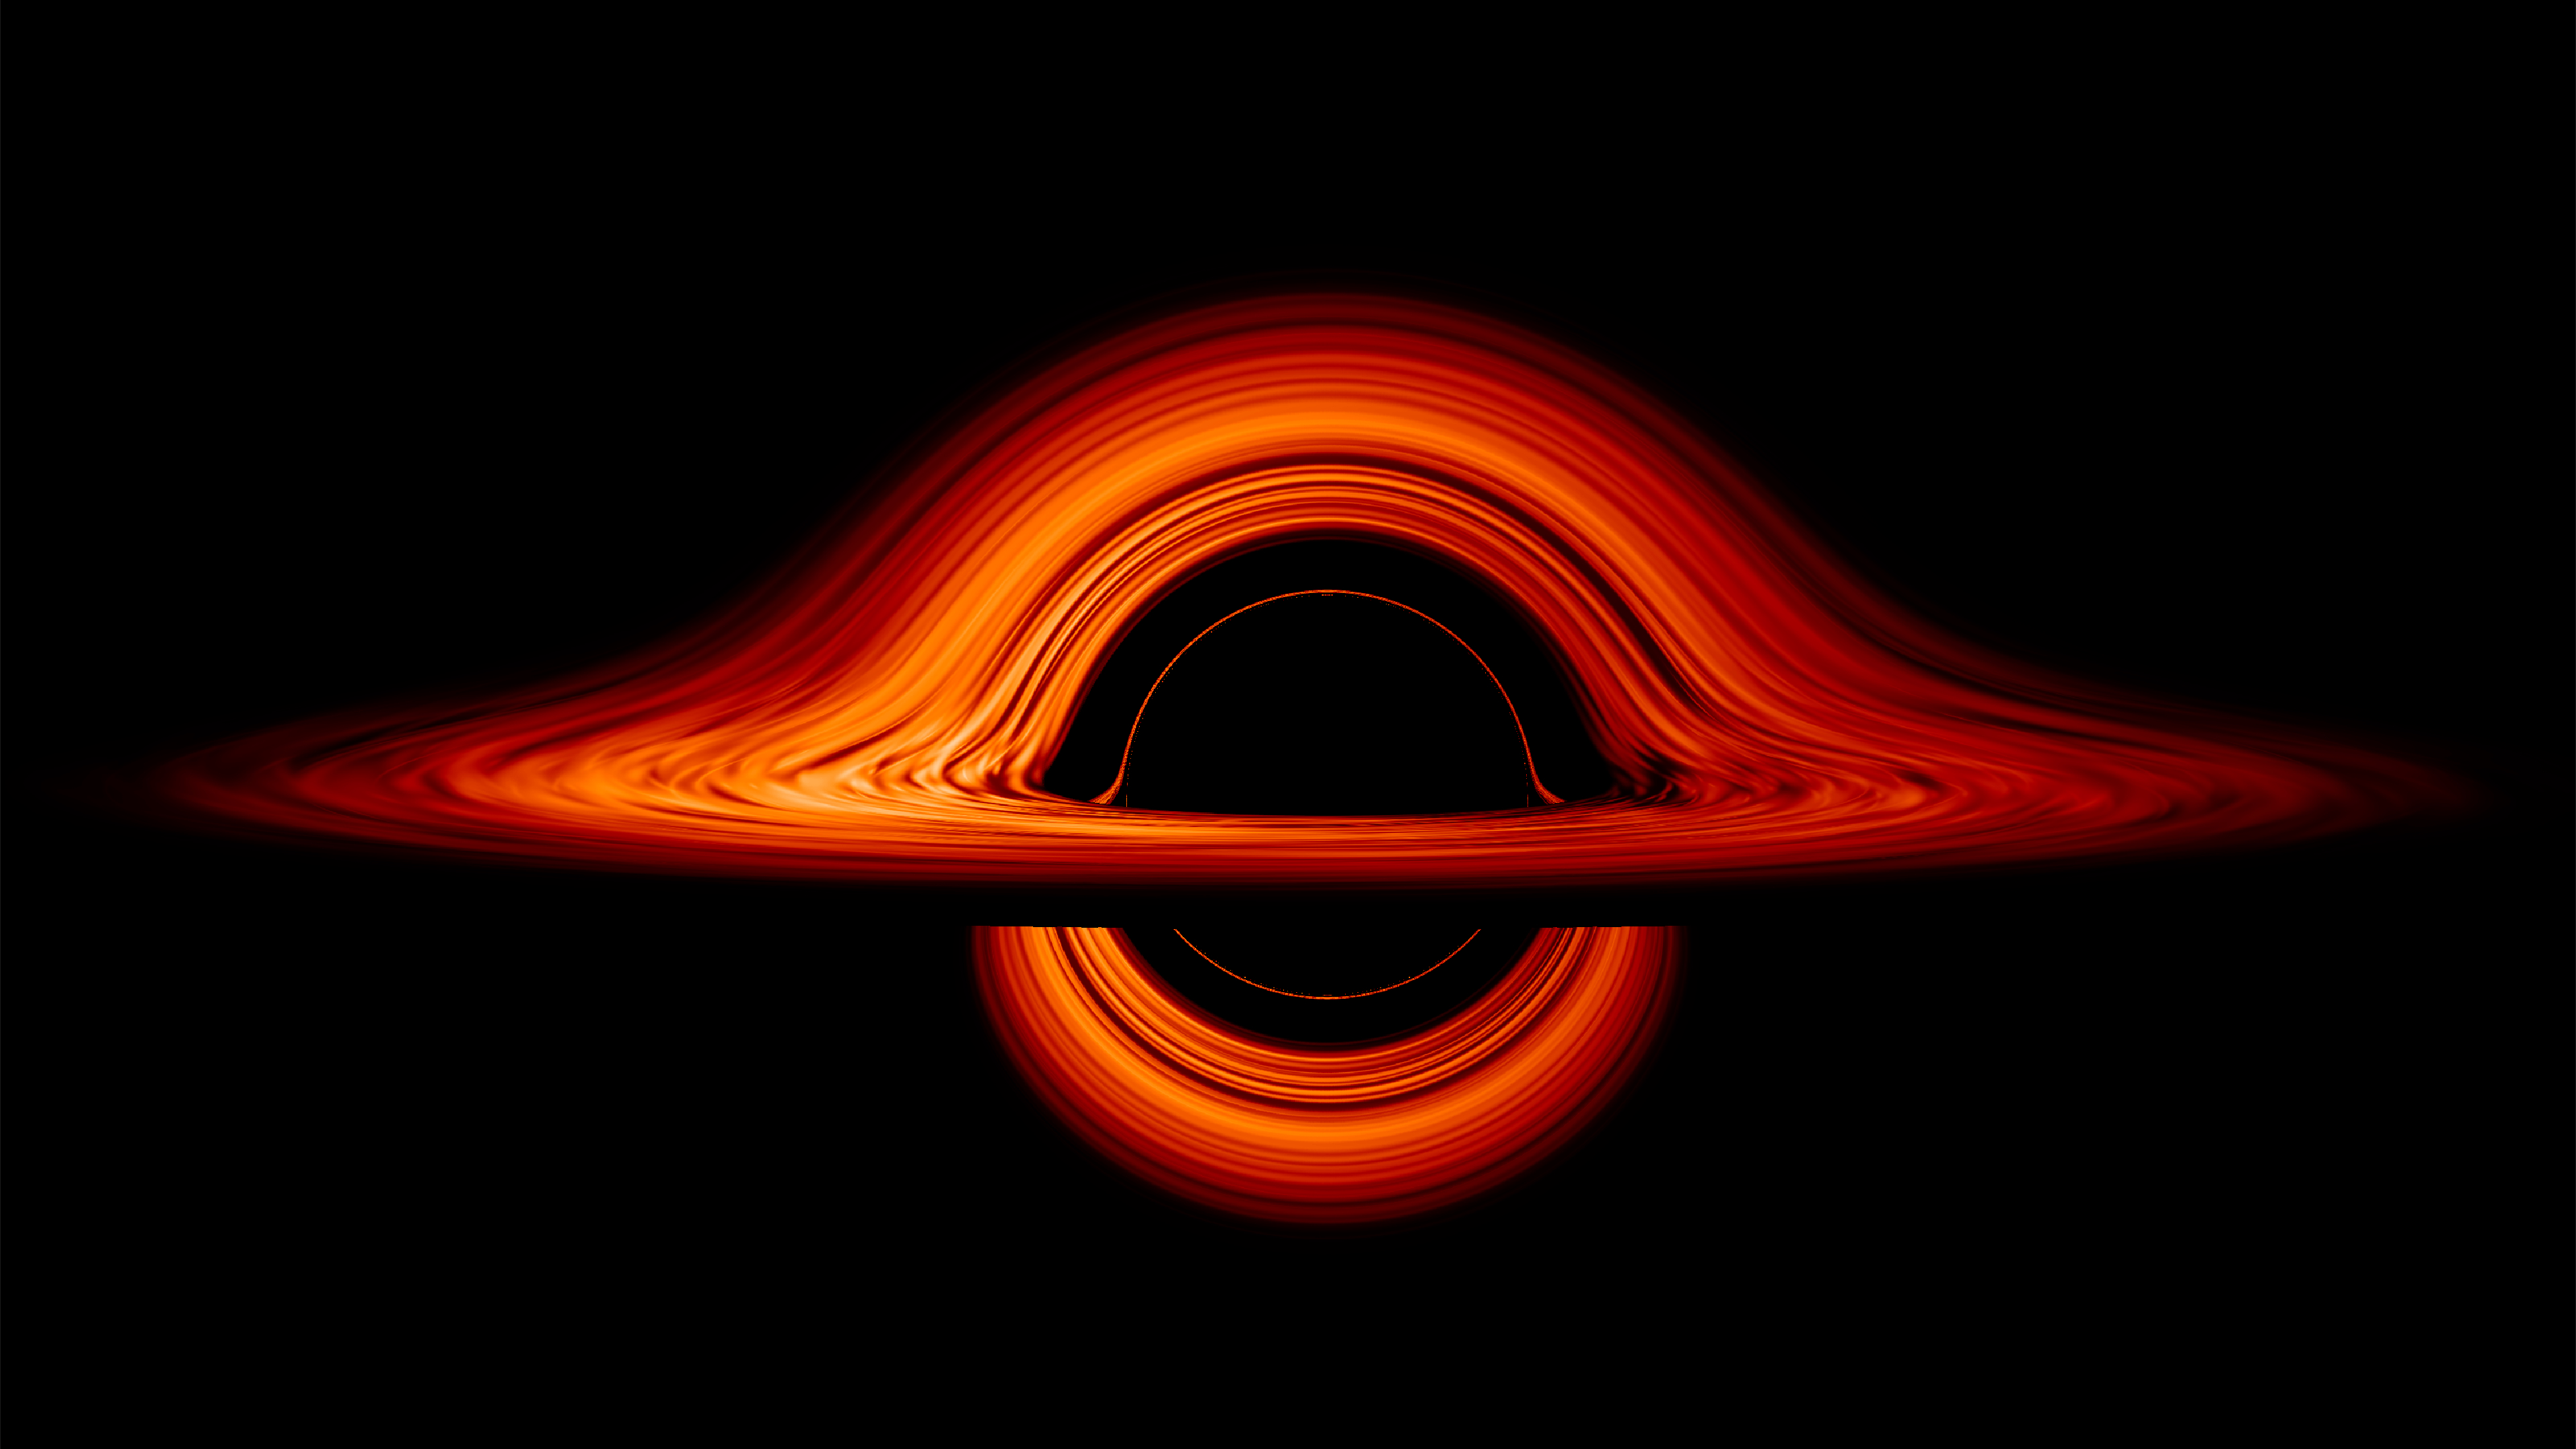

In [23]:
Image(filename="nasa_bh_visualization.jpg", width=456)

While not a strictly mathematical relationship, there are similarities in the shape of NASA's rendering of a black hole and the xyz plane for `b=.4`. While prehaps not the relationship to precisley model a black hole, it begs the question, what does this differential equation represent, and what would the relationship for a block hole be. The relation between the natural world and mathematics points out the obvious question, "if the equation represents nothing in the real world, does it mean anything?" 

#### Time Period Analysis

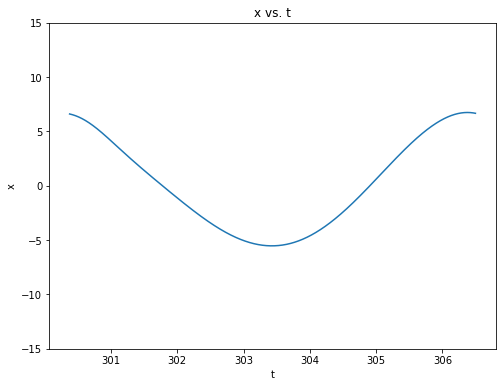

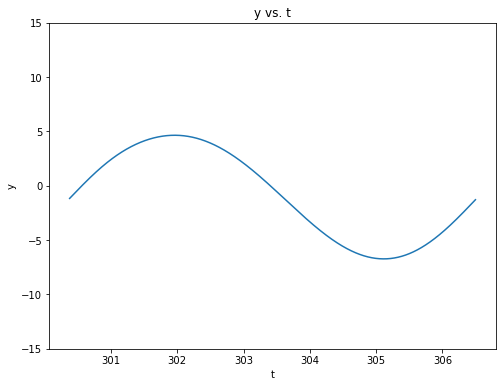

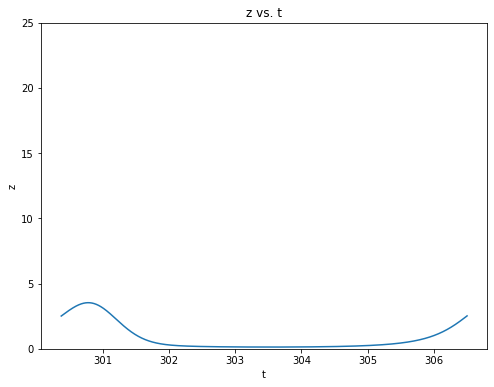

In [24]:
series_15.plotx(t=(300.375, 306.5))
series_15.ploty(t=(300.375, 306.5))
series_15.plotz(t=(300.375, 306.5))

In order to efficiently construct the GIF(a minimal number of frames), determining the period of the graph was necesary. In order to do this, a slice of the x, y and z components were grabbed. The determination of where this was, and how long the slice should be was made by enforcing the criteria: 1) the function must be stable, i.e. the magnitude of the oscillation a constant. 2) More than 2 periods must be selected in their entirety. This led to the slice 300, 325 being selected as the function was stable and there were about 4 periods in the slice. Once this slice was chosen, the x, y, and z components periods seemed to be the same. This meant any point for any of the functions could be used to determine the period. The x direction was selected. The period was defined as the time forthe function to return to its initial value $x(t_0).$ After manipulation of the length, the period was determined to be around 6.125 seconds.

#### Future Analysis
While many relationships can be discussed now, this body does not make it simple to understand what changes the angle of the ellipse. This would be an interesting experiment to observe how the shift in angle between the x and y functions would affect the angle of a ellipse. This example is limited in its flexibility however, as a practical application this code base is useful. The structure of defining an equation and solving it as an object is very elegant and requires little outside code, however... The current function is not as efficient as it can be and should be optimized and better leverage the pre-existing code bases that can solve problems like this.

## Conclusions

The ODE as defined at the top reveals a great multitude of patterns and relationships. A significant relationship is the nearly perfectly phase shifted x and y values for `b=1.5`. Further analysis of the 2D plots for `b=1.5` shows that no equation, ($\frac{d\vec{x}}{dt}$, $\frac{d\vec{y}}{dt}$, $\frac{d\vec{z}}{dt}$) is dependent on solely one value. The analysis of the asymptotic values with respect to b showed convergence at certain points and even distributions at others, while, with the exception of the borders, the density was a relatively smooth function. An analysis of snapshots of the $z(x,y)$, $y(x)$, and $x(t)$ graphs at b=1.0, .8,.7, .4, confirmed the conclusions taken from the asymptotic behaivor graph. The graphs show the convergence of the function at particular values and how this convergence varied with b. The graph of b vs. x shows these relationships analyzing only the maxima. A further look at the graphs and data would reveal similarities in the structure between the graphs and natural phenomenas well as showing similarities that persisted for all cases of b. 